Степанов Вячеслав Анатольевич

БСВ23-01

номера функций: 12; 6

## Построение графика поверхности и линий уровня для функции 2х перременных

$$
f_{12}(x) = 
\frac{1 + \cos(12\sqrt{x_1^2 +x_2^2})}
{0.5(x_1^2+x_2^2)+2} 


,x_i \in [-5.12,5.12],i = 1,2


$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Функция создания сетки точек
def generatemesh(func, lb, rb, num_points=100):
    x1_min, x2_min = lb[0], lb[1]
    x1_max, x2_max = rb[0], rb[1]
    
    x1_vals = np.linspace(x1_min, x1_max, num_points)
    x2_vals = np.linspace(x2_min, x2_max, num_points)
    X, Y = np.meshgrid(x1_vals, x2_vals)
    
    Z = func(X, Y)
    
    return X, Y, Z

# Функция создания визуализации
def draw_surface_contour(X, Y, Z, function_name, levels=50):
    # график с размером и разрешением
    plt.figure(figsize=(16, 7), dpi=300)
    
    # график поверхности слева
    ax1 = plt.subplot(121, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, cmap='turbo', edgecolor='none')
    ax1.set_xlabel('X1')
    ax1.set_ylabel('X2')
    ax1.set_zlabel('Z')
    plt.colorbar(surf, ax=ax1, label='Z')

    #  график  линий уровня справа
    ax2 = plt.subplot(122)
    contour = ax2.contourf(X, Y, Z, levels, cmap='turbo')
    ax2.set_xlabel('X1')
    ax2.set_ylabel('X2')
    plt.colorbar(contour, ax=ax2, label='Z')
    plt.suptitle(function_name, fontsize=16, y=1)
    
    # Отображаем график
    plt.show()

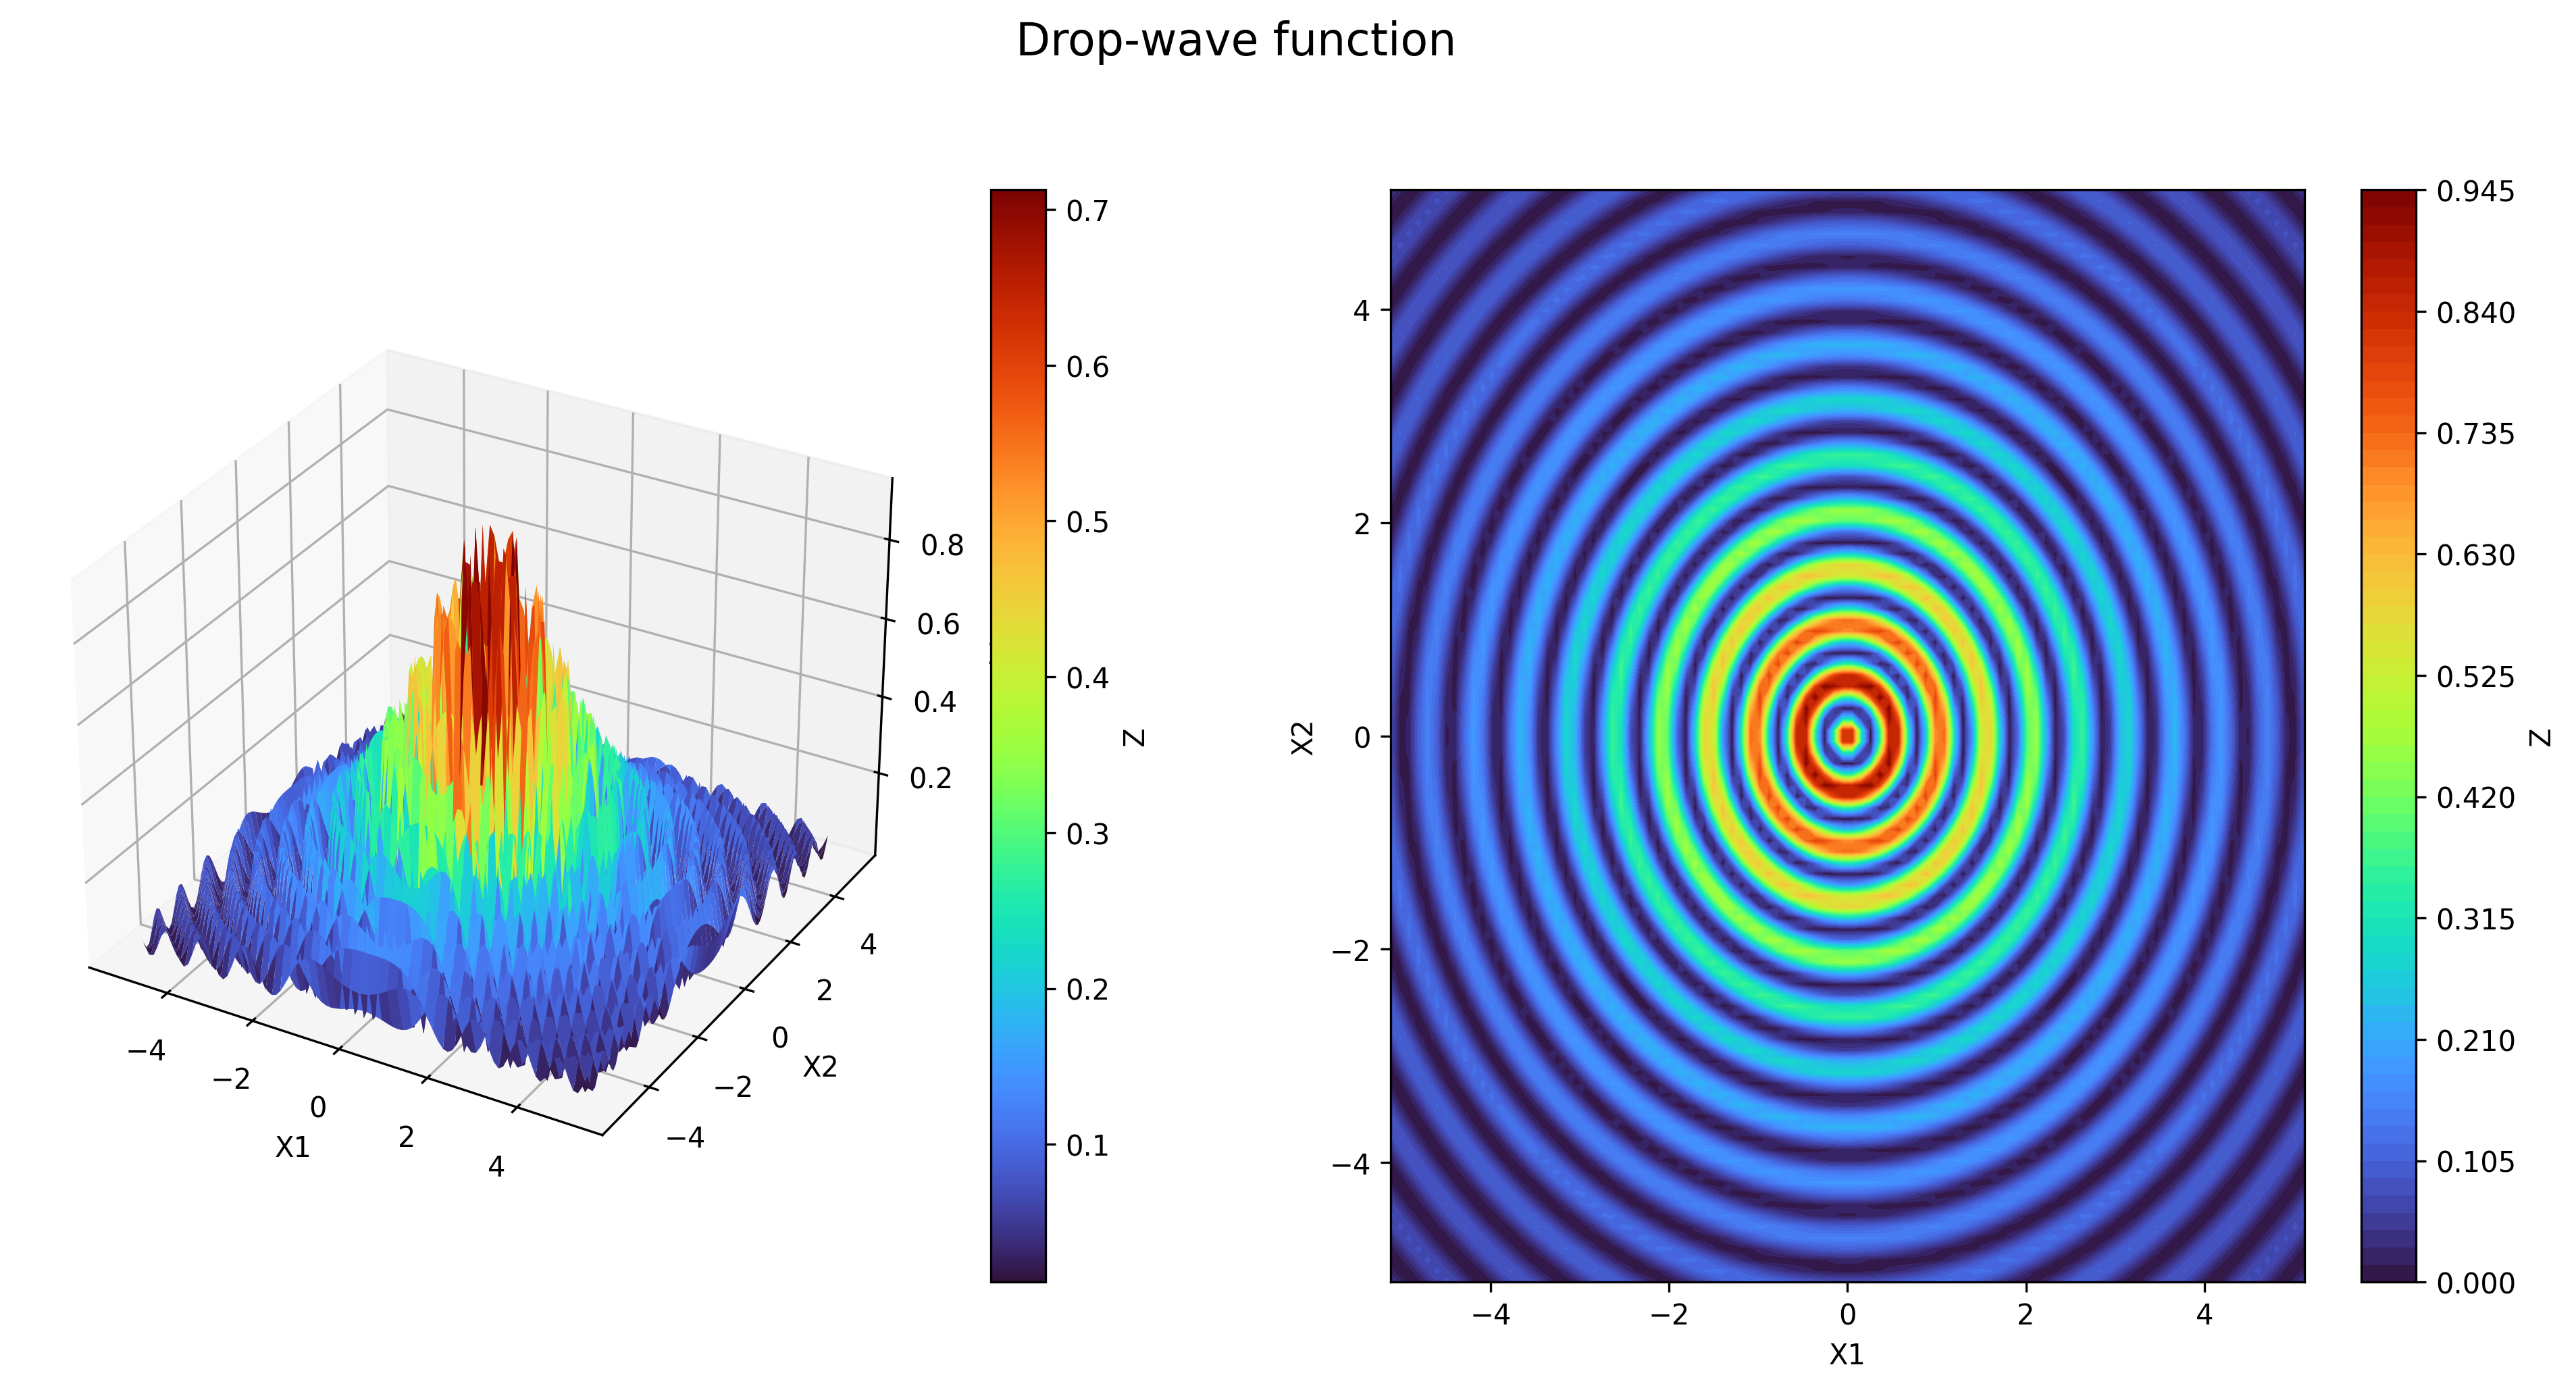

In [3]:
def my_beautiful_function2d(x1, x2):
    return (1 + np.cos(12*np.sqrt(np.power(x1,2)+np.power(x2,2))))/(0.5*(np.power(x1,2)+np.power(x2,2))+2)

lb = [-5.12, -5.12]
rb = [5.12, 5.12]
num_points = 100

X, Y, Z = generatemesh(my_beautiful_function2d, lb, rb, num_points)

function_name = "Drop-wave function"
levels = 75
draw_surface_contour(X, Y, Z, function_name, levels)

$$
f_6(x) = 418.9829 \cdot d - \sum_{i=1}^{d} (x_i \cdot \sin(\sqrt{|x_i|}))\\
d = 2\\
x_i \in [-500,500], i=1,2,...,d
$$

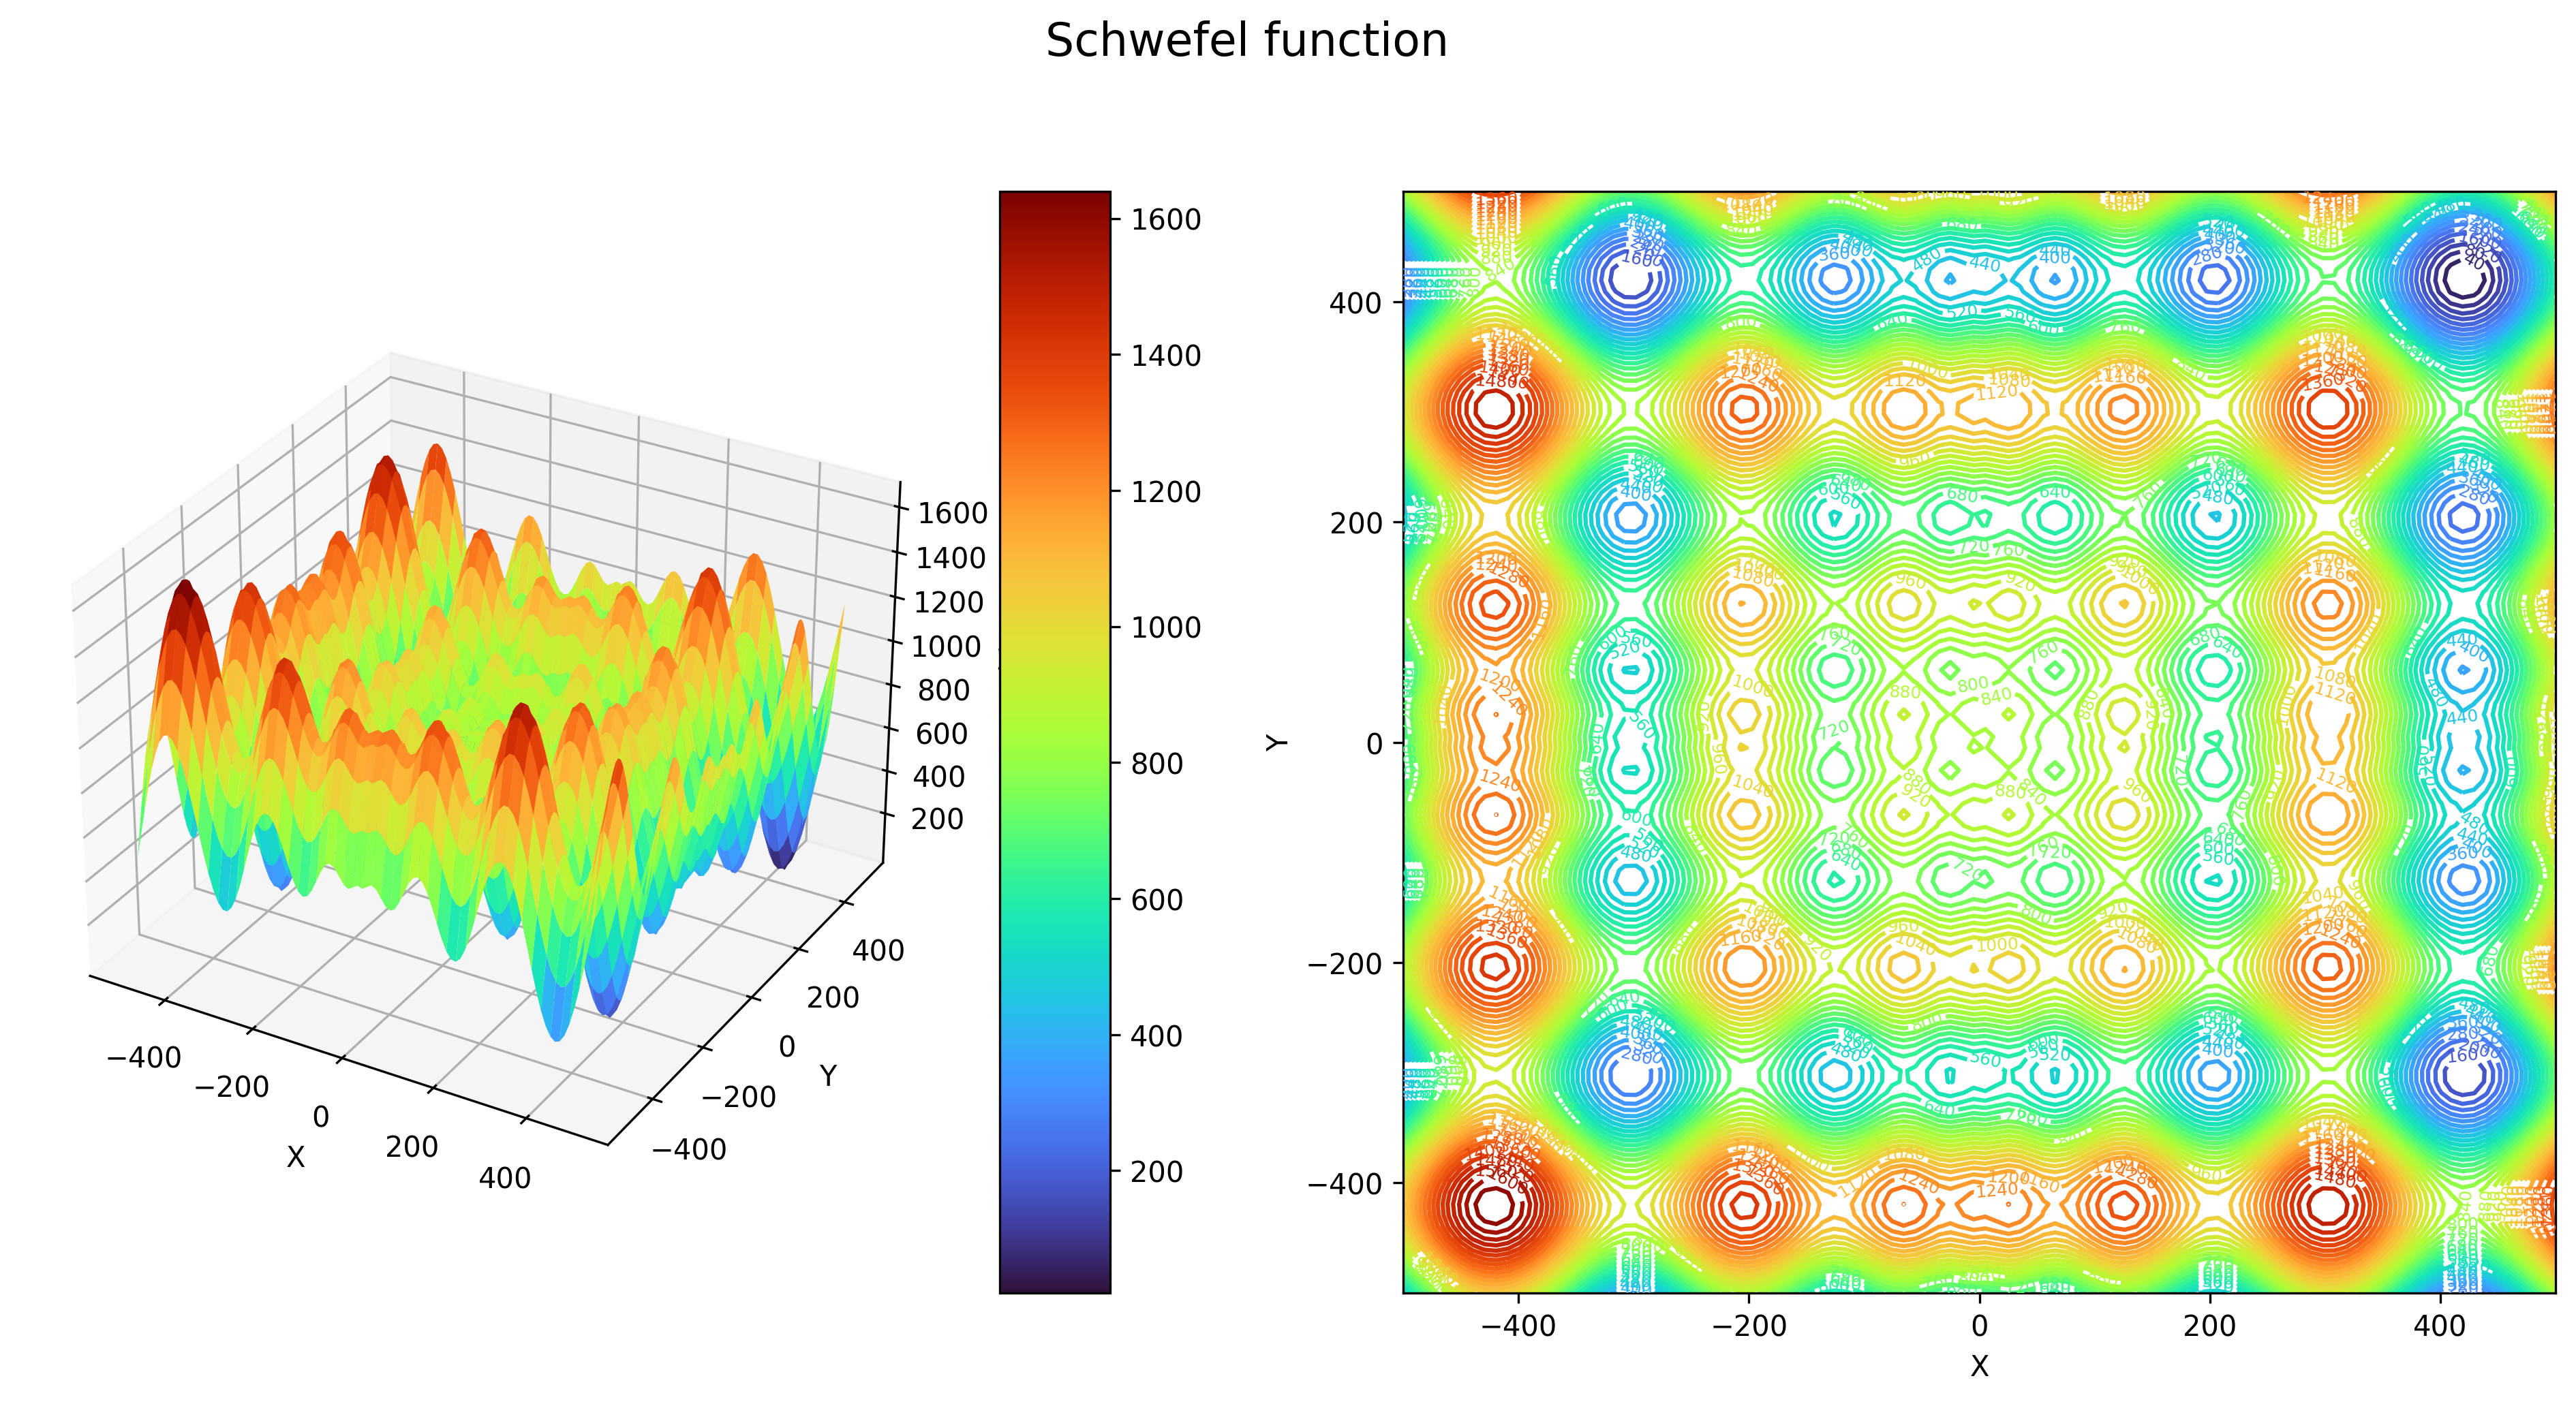

In [4]:
def my_beautiful_function2d(x):
    d = 2
    return 418.9829 * d - (np.sum(x * np.sin(np.sqrt(np.abs(x))), axis=0))

def generatemesh(func, lb, rb, num_points):
    x1_min, x1_max = lb
    x2_min, x2_max = rb
    x1_vals = np.linspace(x1_min, x1_max, num_points)
    x2_vals = np.linspace(x2_min, x2_max, num_points)
    X, Y = np.meshgrid(x1_vals, x2_vals)
    # объединияю два одномерных массива в один двумерный массив points
    points = np.vstack([X.ravel(), Y.ravel()])
    Z = func(points)
    Z = Z.reshape(X.shape) 
    return X, Y, Z

def draw_surface_contour(X, Y, Z, function_name, levels=50):
    fig = plt.figure(figsize=(16, 7), dpi=300)

    # Левый график
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, cmap='turbo', alpha=1)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    fig.colorbar(surf, ax=ax1, aspect=10)

    # Праый график
    ax2 = fig.add_subplot(122)
    contour = ax2.contour(X, Y, Z, levels=levels, cmap='turbo')
    ax2.clabel(contour, inline=True, fontsize=6)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')

    plt.suptitle(function_name, fontsize=16, y=1)
    plt.show()



lb = (-500,500)
rb = (-500,500)
num_points = 100

X, Y, Z = generatemesh(my_beautiful_function2d,lb,rb,num_points)
function_name = "Schwefel function"
draw_surface_contour(X, Y, Z, function_name)
